### Job change of data scientists
Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision
Please refer to the following task for more details:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015

In [128]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot
from scipy.stats import norm, skew, boxcox
import matplotlib.pyplot as plt
import missingno as msno

In [55]:
job_train = pd.read_csv('JobChange_datascientists/aug_train.csv')
job_test = pd.read_csv('JobChange_datascientists/aug_test.csv')
job_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [56]:
job_train = job_train.rename(columns={'relevent_experience': 'relevant_experience'})
job_test = job_test.rename(columns={'relevent_experience': 'relevant_experience'})

In [57]:
job_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [58]:
job_train['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

### These visualization until plt.distplot refers to https://www.kaggle.com/rafetcan/hr-analytics-eda-modeling

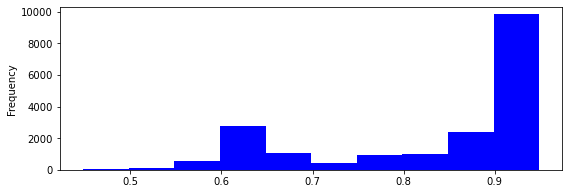

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.824       4
0.807       4
0.625       3
0.781       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64


In [59]:
plt.figure(figsize=(9,3))
plt.hist(job_train['city_development_index'], color='blue')
plt.ylabel('Frequency')
plt.show()

print(job_train['city_development_index'].value_counts())

C:\Users\Z-Service\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


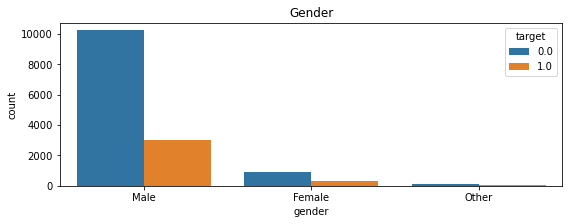

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


In [60]:
plt.figure(figsize=(9, 3))
sns.countplot(job_train['gender'], hue='target', data=job_train)
plt.title('Gender')
plt.show()

print(job_train['gender'].value_counts())

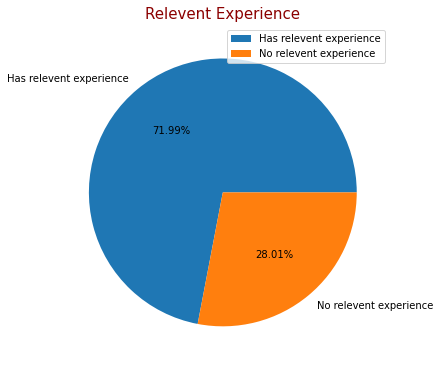

Has relevent experience    13792
No relevent experience      5366
Name: relevant_experience, dtype: int64


In [61]:
plt.figure(figsize=(6, 8))
experience_index = job_train['relevant_experience'].value_counts().index
experience_values = job_train['relevant_experience'].value_counts().values
plt.pie(experience_values, labels=experience_index, autopct='%1.2f%%')
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

print(job_train['relevant_experience'].value_counts())

### In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. In this dataset, all rows have 7 - 14 valid values and hence 0 - 7 missing values.

<AxesSubplot:>

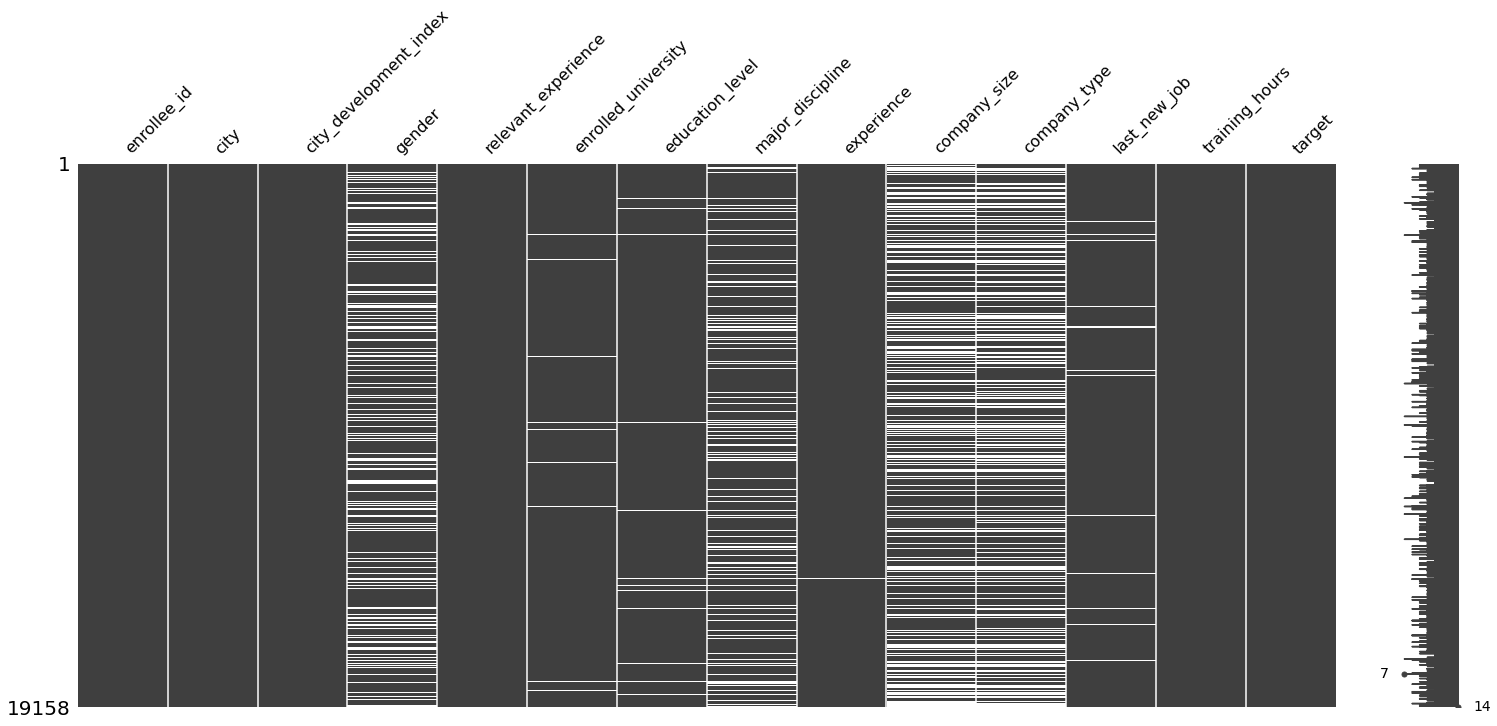

In [62]:
msno.matrix(job_train)

<AxesSubplot:>

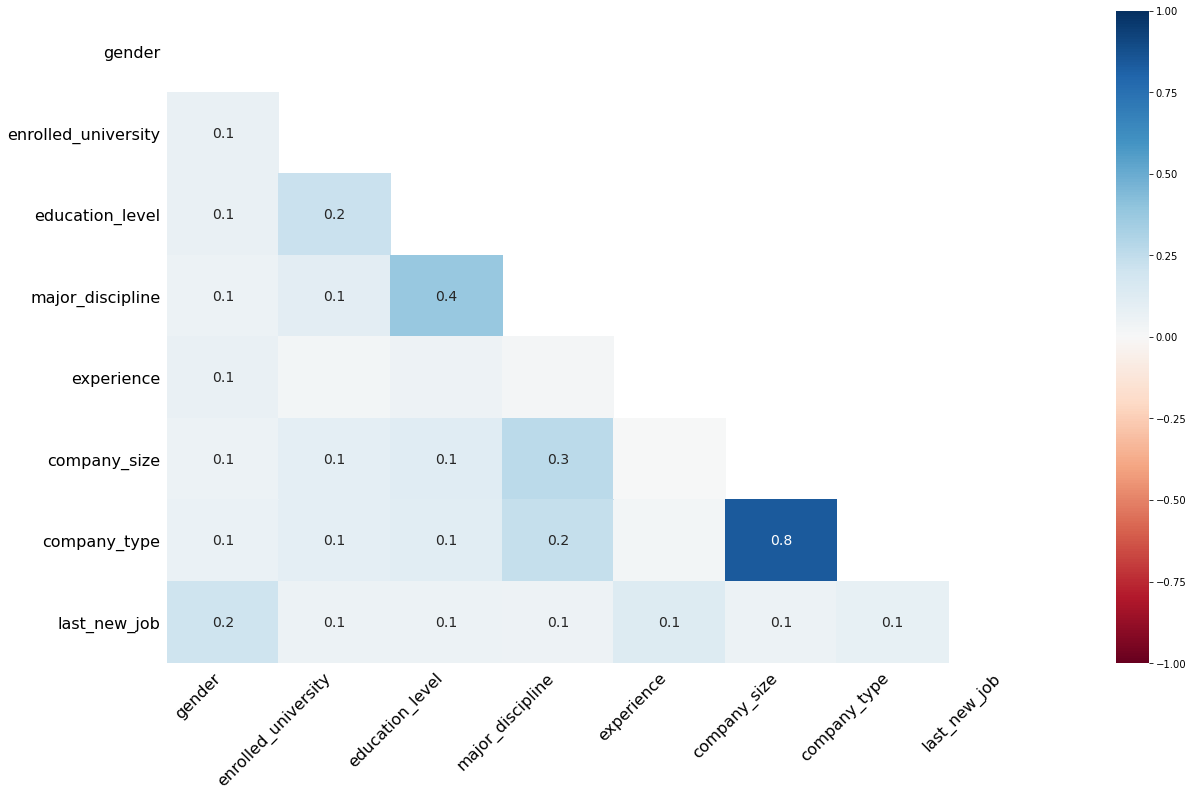

In [63]:
msno.heatmap(job_train)

<AxesSubplot:>

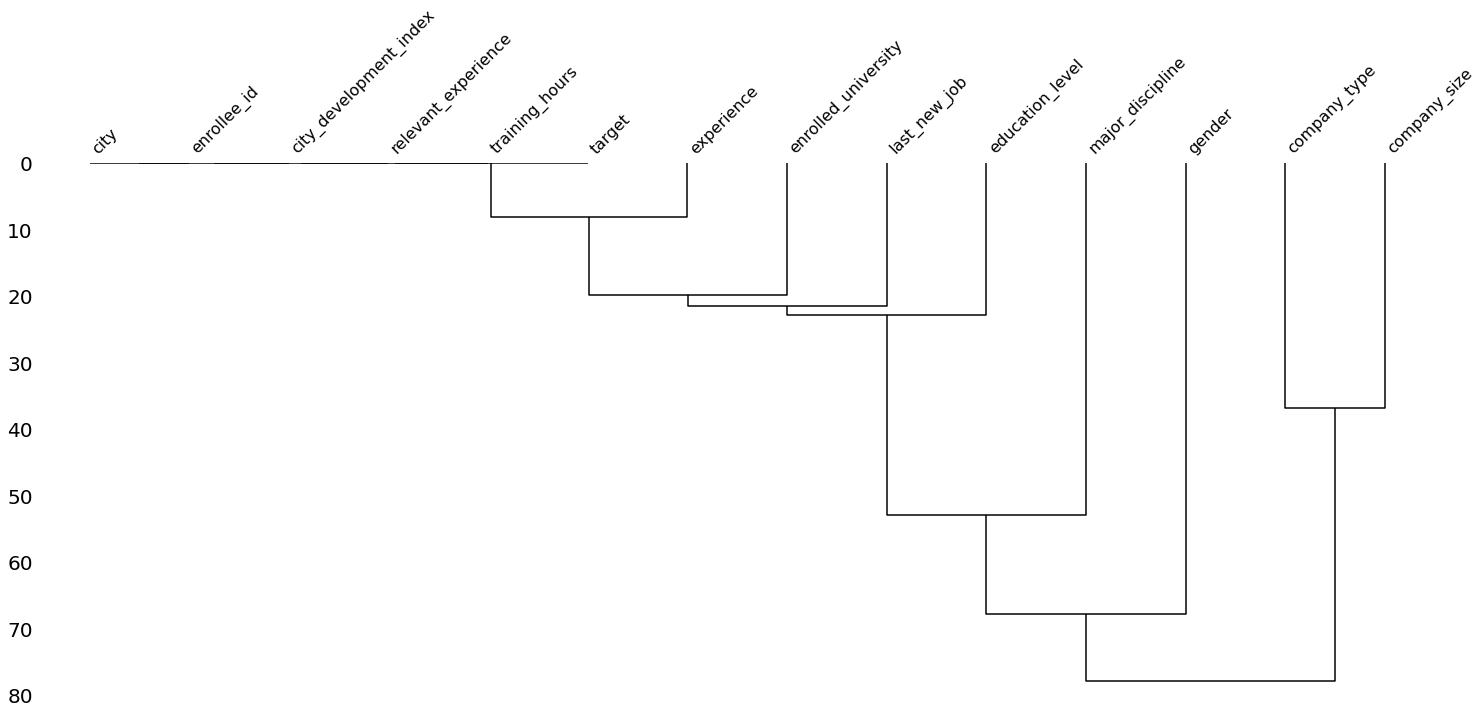

In [64]:
msno.dendrogram(job_train)

<AxesSubplot:>

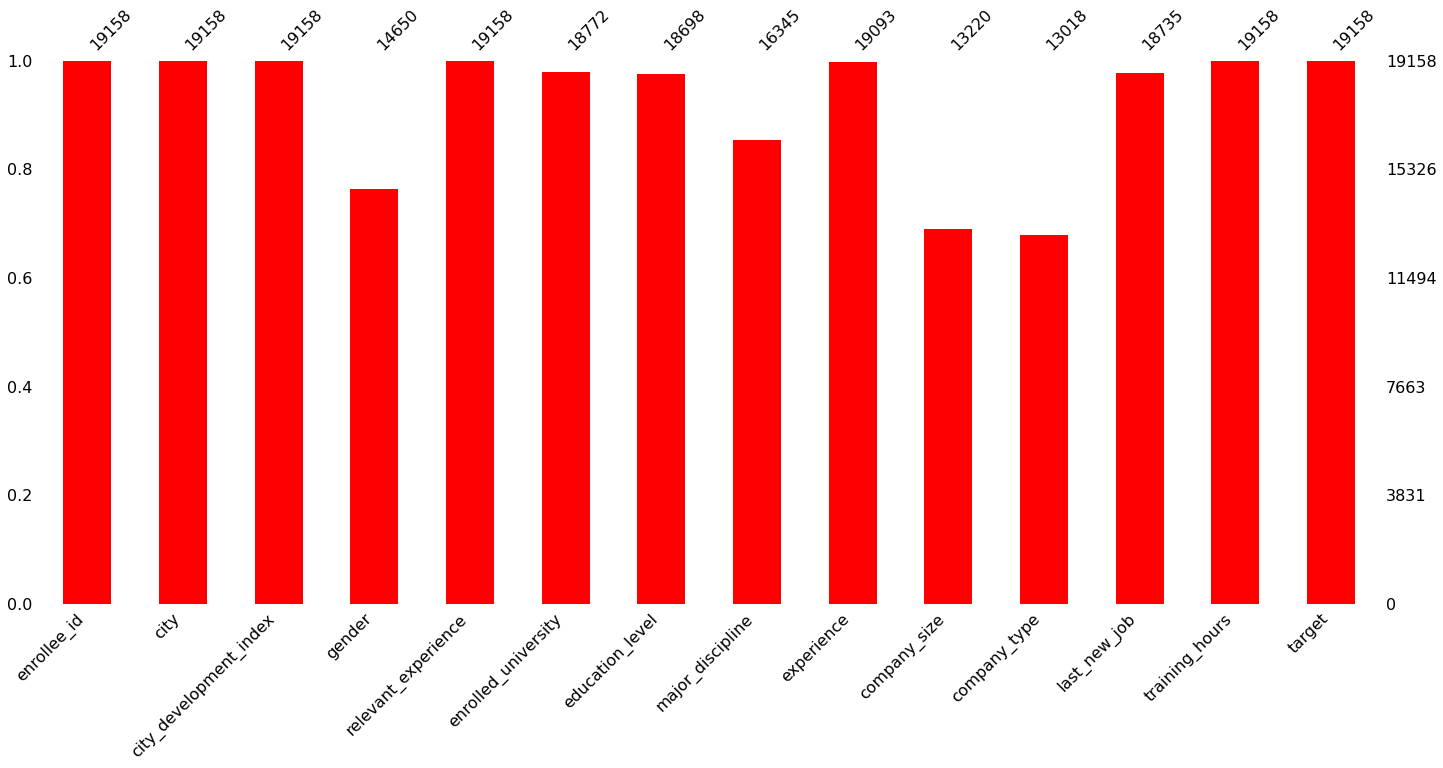

In [65]:
msno.bar(job_train, color='red')

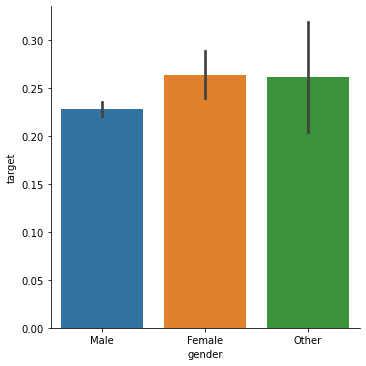

In [66]:
g = sns.catplot(x='gender', y='target', data=job_train, kind='bar')
# g.set_xticklabels(['Female', 'Male', 'Other'])
# g.set_yticklabels('Target')
plt.show()

C:\Users\Z-Service\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


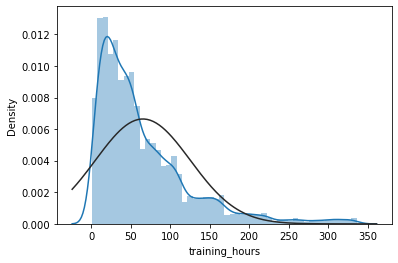

mu training_hours: 65.36689633573442, sigma training_hours: 60.05689445297729


In [67]:
# mu is mean | sigma is standard deviation
sns.distplot(job_train['training_hours'], fit=norm)
plt.show()
(mu, sigma) = norm.fit(job_train['training_hours'])
print('mu {}: {}, sigma {}: {}'.format('training_hours', mu, 'training_hours', sigma))

In [68]:
job_train.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [69]:
job_test.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [70]:
job_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [71]:
print(job_train.shape[0])
print(job_test.shape[0])

19158
2129


In [72]:
job_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [73]:
job_train['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [74]:
job_train['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [75]:
job_train['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

### Fillna with 'No data', 0, and -1

In [76]:
no_data_columns = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']
zero_columns = ['company_size', 'experience']

for i in no_data_columns:
    job_train[i] = job_train[i].fillna('No data')
    job_test[i] = job_test[i].fillna('No data')
    
for i in zero_columns:
    job_train[i] = job_train[i].fillna(0)
    job_test[i] = job_test[i].fillna(0)

job_train['last_new_job'] = job_train['last_new_job'].fillna(-1)
job_test['last_new_job'] = job_test['last_new_job'].fillna(-1)


### LabelEncoder

In [77]:
job_train['train'] = 0
job_test['train'] = 1
combined = pd.concat([job_train, job_test])
df = pd.get_dummies(combined[['city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline',
                              'experience', 'company_size', 'company_type', 'last_new_job']])
combined = pd.concat([combined, df], axis=1)
combined = combined.drop(columns={'city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline',
                              'experience', 'company_size', 'company_type', 'last_new_job'})

employee_predicted = job_test['enrollee_id']

job_train = combined[combined['train'] == 0]
job_test = combined[combined['train'] == 1]

job_train = job_train.drop(columns={'train'})
job_test = job_test.drop(columns={'train'})

job_train = job_train.drop(columns={'enrollee_id'})
job_test = job_test.drop(columns={'enrollee_id', 'target'})

### This comment is spared

In [78]:
# combined = combined.reshape(-1, 1)
# combined['experience'] = str(combined['experience'])
# city = OneHotEncoder(sparse=False)
# city.fit_transform(combined[['city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']])
# city.categories_

# city.fit([combined['city']])
# city.transform([combined['city']])


# city.fit(combined['city'].unique())
# df['city'] = combined['city'+'_le'].values.reshape(-1, 1)
# city.transform(combined['city'])

# df['city'+'_le'] = city.transform(combined['city'])
# df['city'+'_le'] = combined['city'+'_le'].values.reshape(-1, 1)
# df['city'+'_le'+'ohe'] = city.transform(combined['city'])

# combined['city'] = city.fit(combined['city'])
# encoder = ['city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline',
#            'experience', 'company_size', 'company_type', 'last_new_job']

# city = OneHotEncoder()
# city.fit(job_train['city'])
# gender = LabelEncoder()
# relevant_experience = LabelEncoder()
# enrolled_university = LabelEncoder()
# education_level = LabelEncoder()
# major_discipline = LabelEncoder()
# experience = LabelEncoder()
# company_size = LabelEncoder()
# company_type = LabelEncoder()
# last_new_job = LabelEncoder()

# job_train['city'] = city.fit_transform(job_train['city'])
# job_test['city'] = city.fit_transform(job_test['city'])
# job_train['gender'] = gender.fit_transform(job_train['gender'])
# city_train_mapping = dict(zip(city_train.classes_, city_train.transform(city_train.classes_)))
# city_test_mapping = dict(zip(city_test.classes_, city_test.transform(city_test.classes_)))
# gender_mapping = dict(zip(gender.classes_, gender.transform(gender.classes_)))
# print(f'City_train: {city_train_mapping}')
# print(f'City_test: {city_test_mapping}')

# job_train['city'].apply(OneHotEncoder().fit_transform)

# for i in encoder:
# #     print(job_train[i])
#     job_train[i].apply(OneHotEncoder().fit_transform)

In [79]:
columns = job_train.columns
for i in columns:
    print(f'{i}: {job_train[i].unique()}')

city_development_index: [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]
training_hours: [ 36  47  83  52   8  24  18  46 123  32 108  23  26 106   7 132  68  50
  48  65  13  22 148  72  40 141  82 145 206 152  42  14 112  87  20  21
  92 102  43  45  19  90  25  15  98 142  28 228  29  12  17  35   4 136
  27  74  86  75 332 140 182 172  33  34 150 160   3   2 210 101  59 260
 131 109  70  51  60 164 290 133  76 156 120 100  39  55  49   6 125 326
 198  11  41 114 246  81  31  

In [80]:
# features = ['city', 'city_development_index', 'gender', 'relevant_experience', 
#             'enrolled_university', 'education_level', 'major_discipline',
#             'experience', 'company_size', 'company_type', 'last_new_job',
#             'training_hours']

features = ['city_development_index', 'training_hours', 'city_city_1', 'city_city_10', 
            'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103', 'city_city_104', 
            'city_city_105', 'city_city_106', 'city_city_107', 'city_city_109', 'city_city_11', 
            'city_city_111', 'city_city_114', 'city_city_115', 'city_city_116', 'city_city_117', 
            'city_city_118', 'city_city_12', 'city_city_120', 'city_city_121', 'city_city_123', 
            'city_city_126', 'city_city_127', 'city_city_128', 'city_city_129', 'city_city_13', 
            'city_city_131', 'city_city_133', 'city_city_134', 'city_city_136', 'city_city_138', 
            'city_city_139', 'city_city_14', 'city_city_140', 'city_city_141', 'city_city_142', 
            'city_city_143', 'city_city_144', 'city_city_145', 'city_city_146', 'city_city_149', 
            'city_city_150', 'city_city_152', 'city_city_155', 'city_city_157', 'city_city_158', 
            'city_city_159', 'city_city_16', 'city_city_160', 'city_city_162', 'city_city_165', 
            'city_city_166', 'city_city_167', 'city_city_171', 'city_city_173', 'city_city_175', 
            'city_city_176', 'city_city_179', 'city_city_18', 'city_city_180', 'city_city_19', 
            'city_city_2', 'city_city_20', 'city_city_21', 'city_city_23', 'city_city_24', 
            'city_city_25', 'city_city_26', 'city_city_27', 'city_city_28', 'city_city_30', 
            'city_city_31', 'city_city_33', 'city_city_36', 'city_city_37', 'city_city_39', 
            'city_city_40', 'city_city_41', 'city_city_42', 'city_city_43', 'city_city_44', 
            'city_city_45', 'city_city_46', 'city_city_48', 'city_city_50', 'city_city_53', 
            'city_city_54', 'city_city_55', 'city_city_57', 'city_city_59', 'city_city_61', 
            'city_city_62', 'city_city_64', 'city_city_65', 'city_city_67', 'city_city_69', 
            'city_city_7', 'city_city_70', 'city_city_71', 'city_city_72', 'city_city_73', 
            'city_city_74', 'city_city_75', 'city_city_76', 'city_city_77', 'city_city_78', 
            'city_city_79', 'city_city_8', 'city_city_80', 'city_city_81', 'city_city_82', 
            'city_city_83', 'city_city_84', 'city_city_89', 'city_city_9', 'city_city_90', 
            'city_city_91', 'city_city_93', 'city_city_94', 'city_city_97', 'city_city_98', 
            'city_city_99', 'gender_Female', 'gender_Male', 'gender_No data', 'gender_Other', 
            'relevant_experience_Has relevent experience', 'relevant_experience_No relevent experience', 
            'enrolled_university_Full time course', 'enrolled_university_No data', 
            'enrolled_university_Part time course', 'enrolled_university_no_enrollment', 
            'education_level_Graduate', 'education_level_High School', 'education_level_Masters', 
            'education_level_No data', 'education_level_Phd', 'education_level_Primary School', 
            'major_discipline_Arts', 'major_discipline_Business Degree', 'major_discipline_Humanities', 
            'major_discipline_No Major', 'major_discipline_No data', 'major_discipline_Other', 
            'major_discipline_STEM', 'experience_0', 'experience_1', 'experience_10', 'experience_11', 
            'experience_12', 'experience_13', 'experience_14', 'experience_15', 'experience_16', 
            'experience_17', 'experience_18', 'experience_19', 'experience_2', 'experience_20', 
            'experience_3', 'experience_4', 'experience_5', 'experience_6', 'experience_7', 'experience_8', 
            'experience_9', 'experience_<1', 'experience_>20', 'company_size_0', 'company_size_10/49', 
            'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99', 
            'company_size_500-999', 'company_size_5000-9999', 'company_size_<10', 'company_type_Early Stage Startup', 
            'company_type_Funded Startup', 'company_type_NGO', 'company_type_No data', 'company_type_Other', 
            'company_type_Public Sector', 'company_type_Pvt Ltd', 'last_new_job_-1', 'last_new_job_1', 
            'last_new_job_2', 'last_new_job_3', 'last_new_job_4', 'last_new_job_>4', 'last_new_job_never']

X = job_train[features]
y = job_train['target']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

test_X = job_test[features]
# val_y = job_test['target']


def get_accuracy(max_leaf_nodes, train_X, train_y, val_X, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    val_predicted = model.predict(val_X)
    acc = accuracy_score(val_y, val_predicted)
    return acc

# 100 has the best accuracy
for max_leaf_nodes in [5, 10, 50, 80, 100, 150, 200, 250, 300, 350, 400, 450]:
    acc_score = get_accuracy(max_leaf_nodes, train_X, train_y, val_X, val_y)
    print(f'Max leaf nodes: {max_leaf_nodes}, Acc: {acc_score}')

Max leaf nodes: 5, Acc: 0.7847077244258872
Max leaf nodes: 10, Acc: 0.7927974947807933
Max leaf nodes: 50, Acc: 0.791231732776618
Max leaf nodes: 80, Acc: 0.795929018789144
Max leaf nodes: 100, Acc: 0.7967118997912317
Max leaf nodes: 150, Acc: 0.7925365344467641
Max leaf nodes: 200, Acc: 0.7862734864300627
Max leaf nodes: 250, Acc: 0.7865344467640919
Max leaf nodes: 300, Acc: 0.7813152400835073
Max leaf nodes: 350, Acc: 0.7828810020876826
Max leaf nodes: 400, Acc: 0.7813152400835073
Max leaf nodes: 450, Acc: 0.7826200417536534


In [81]:
model = DecisionTreeClassifier(max_leaf_nodes=100, random_state=1)
model.fit(train_X, train_y)
val_predicted = model.predict(val_X)

In [82]:
print(classification_report(val_y, val_predicted))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2884
         1.0       0.58      0.66      0.61       948

    accuracy                           0.80      3832
   macro avg       0.73      0.75      0.74      3832
weighted avg       0.81      0.80      0.80      3832



### These lines are spared

In [51]:
# print(train_X.shape[0])
# print(val_X.shape[0])
# print(train_y.shape[0])
# print(val_y.shape[0])

print(accuracy_score(val_y, val_predicted))

print(classification_report(val_y, val_predicted))

# acc_predicted = accuracy_score(val_y, val_predicted)
# acc_predicted
# print(val_y[val_y == 0].shape[0])
# print(val_predicted[val_predicted == 0].shape[0])
# print(val_y[val_y == 1].shape[0])
# print(val_predicted[val_predicted == 1].shape[0])

val_y = val_y.values
# print(val_y)
# print(val_predicted)
# val_y.shape[0]
count_true = (val_y == val_predicted)
print(f'True: {count_true[count_true == True].shape[0]}')
print(f'False: {count_true[count_true == False].shape[0]}')
print(val_y)
print(val_predicted)
print(count_true)
# val_predicted[0]
# acc_predicted = accuracy_score(val_y, val_predicted)

# print(val_y[1])


# print(mean_absolute_error(val_y, val_predictions))

0.7967118997912317


TypeError: 'str' object is not callable

### Accuracy of the validation set by the decision tree model

In [31]:
100*(3037/3832)

79.2536534446764

### Feature importance

In [83]:
importance = model.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i, v))

Feature: 0, Score: 0.46943
Feature: 1, Score: 0.03299
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00338
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02542
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00176
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [84]:
# print(dict(zip(train_X.columns, model.feature_importances_)))

importance_features_dict = {}

for i, v in enumerate(model.feature_importances_):
    importance_features_dict[i] = v
    
importance_features_list = sorted(importance_features_dict,
                                  key=importance_features_dict.get,
                                  reverse=True)

importance_features_list[:5]


[0, 171, 135, 1, 7]

### Features importance (It shows city_development_index, company_size, education_level, training_hours, and last_new_job are the top 5 features affecting candidate decision

In [86]:
count = 0
for i in importance_features_list:
    if count == 9:
        break
    print(train_X.columns[i])
    count += 1
    
# print(train_X.columns[1], train_X.columns[0],  train_X.columns[171], train_X.columns[135], train_X.columns[137])

city_development_index
company_size_0
education_level_Graduate
training_hours
city_city_103
city_city_160
last_new_job_never
company_type_Pvt Ltd
relevant_experience_Has relevent experience


### Model prediction on test set

In [95]:
job_test_predicted = model.predict(test_X)
job_test_predicted = pd.DataFrame(job_test_predicted)
job_test_predicted

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2124,0.0
2125,0.0
2126,0.0
2127,0.0


In [112]:
employee_predicted = pd.concat([employee_predicted, job_test_predicted], axis=1)
employee_predicted = employee_predicted.iloc[:, :2]
employee_predicted = employee_predicted.rename(columns={0: 'target'})
# employee_predicted = employee_predicted.drop(columns={'target'})
# employee_predicted['target'] = employee_predicted['target'].map({1.0: 'Looking', 0.0: 'Not Looking'})
employee_predicted

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,0.0
2125,195,0.0
2126,31762,0.0
2127,7873,0.0


In [127]:
# 0 – Not looking for job change, 1 – Looking for a job change
print(f'Total: {employee_predicted.shape[0]}')
print('Looking for a job change: ', employee_predicted[employee_predicted['target']==1].shape[0])
print('Not loking for a job change: ', employee_predicted[employee_predicted['target']==0].shape[0])

Total: 2129
Looking for a job change:  611
Not loking for a job change:  1518


### These below lines is just setting and installation

In [55]:
print(job_train.columns.tolist())

['city_development_index', 'training_hours', 'target', 'city_city_1', 'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103', 'city_city_104', 'city_city_105', 'city_city_106', 'city_city_107', 'city_city_109', 'city_city_11', 'city_city_111', 'city_city_114', 'city_city_115', 'city_city_116', 'city_city_117', 'city_city_118', 'city_city_12', 'city_city_120', 'city_city_121', 'city_city_123', 'city_city_126', 'city_city_127', 'city_city_128', 'city_city_129', 'city_city_13', 'city_city_131', 'city_city_133', 'city_city_134', 'city_city_136', 'city_city_138', 'city_city_139', 'city_city_14', 'city_city_140', 'city_city_141', 'city_city_142', 'city_city_143', 'city_city_144', 'city_city_145', 'city_city_146', 'city_city_149', 'city_city_150', 'city_city_152', 'city_city_155', 'city_city_157', 'city_city_158', 'city_city_159', 'city_city_16', 'city_city_160', 'city_city_162', 'city_city_165', 'city_city_166', 'city_city_167', 'city_city_171', 'city_city_173', '

In [476]:
pd.set_option('display.max_columns', 200)

In [11]:
pip install missingno